In [4]:
import requests
import sseclient
import pprint
import matplotlib.pyplot as plt

base_url = 'http://localhost:8080'

In [5]:


data = {
  "model": "llm_llama",
  "params": {},
  "prompt": "Hello, how are you?"
}

response = requests.post(f'{base_url}/ai/prompt', json=data)

channel = response.json()['ticket_id']

response = requests.get(f'{base_url}/ai/stream?channel={channel}', headers={'Accept': 'text/event-stream'}, stream=True)  # or with_requests(url, headers)
client = sseclient.SSEClient(response)
for event in client.events():
    pprint.pprint(event.data)
    break

(" I hope you're well. kwietniki2013.pl is a place where you can read about my "
 'life and all the things that happen to me in my everyday life. My name is '
 'Karolina and I live in Poland. I have been writing for blogging since 2016. '
 'I started writing with passion and over time I realized that blogging is not '
 'only a hobby but also a job. Writing is also an opportunity to share your '
 'knowledge with others and help people by telling them something they did not '
 'know before. I have also met wonderful people thanks to blogging.')


In [6]:
import json

data = {
  "model": "embeding_e5",
  "params": {},
  "prompt": json.dumps([
        'query: how much protein should a female eat',
        "passage: As a general guideline, the CDC's average requirement of protein for women ages 19 to 70 is 46 grams per day. But, as you can see from this chart, you'll need to increase that if you're expecting or training for a marathon. Check out the chart below to see how much protein you should be eating each day.",
        "passage: Definition of summit for English Language Learners. : 1  the highest point of a mountain : the top of a mountain. : 2  the highest level. : 3  a meeting or series of meetings between the leaders of two or more governments."
      ])
}

response = requests.post(f'{base_url}/ai/prompt', json=data)

channel = response.json()['ticket_id']

response = requests.get(f'{base_url}/ai/stream?channel={channel}', headers={'Accept': 'text/event-stream'}, stream=True)  # or with_requests(url, headers)
client = sseclient.SSEClient(response)
for event in client.events():
    pprint.pprint(event.data)
    break

'[[69.97346496582031], [71.31929016113281]]'


{'result': [{'_id': 'llm_llama', 'averageProcessTime': 39.29071780975}, {'_id': 'embeding_e5', 'averageProcessTime': 2.320504253}]}


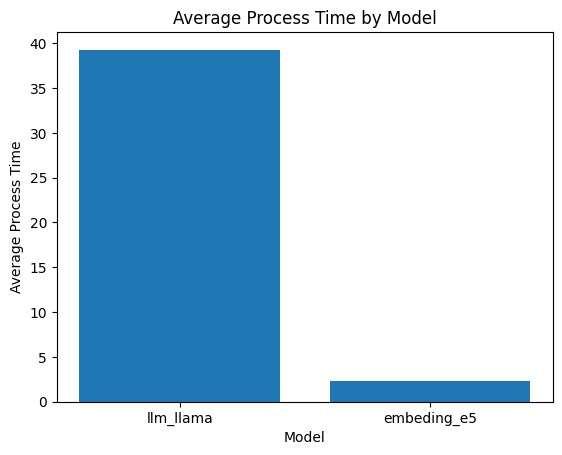

In [7]:
response = requests.get(f'{base_url}/ai/metrics/process_time')  # or with_requests(url, headers)

data = response.json()['result']

x = [d['_id'] for d in data]
y = [d['averageProcessTime'] for d in data]

plt.bar(x, y)

plt.xlabel('Model')
plt.ylabel('Average Process Time')
plt.title('Average Process Time by Model')

plt.show()
